<a href="https://colab.research.google.com/github/EStalei/IC/blob/main/Regressao_EikeStalei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Disciplina: Tópicos em Inteligência Computacional**

Instituto Federal do Norte de Minas Gerais Campus Montes Claros

Curso: Ciência da Computação

Professora: Luciana Balieiro Cosme

Aluno: Eike Stálei Vieira Neves



---


# Exercício

Considere, pelo menos, outras duas características da base de dados Diabetes, repita o exercício:

1.   Para cada característica individualmente compare o resultado com a característica "age", visualmente (gráfico) e por meio duas medidas de erro: $abs(y_{teste} - y_{predito})$) e outra medida da escolha de vocês.
2.   Adicionalmente, combine as duas características (regressão com duas variáveis) e analise o resultado com base nas duas medidas de erro no item anterior.


O código deve ser enviado ao Github e apresentado pelo Flipgrid.

**Data: 07-10-2020**


# **Base de dados real**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()


print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
import pandas

tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
# a progressao da doenca
tabela['y'] = diabetes.target
tabela.head(10)



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [5]:
X = tabela['age']
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

Z = tabela[["age","bmi"]]
Z_treinamento = Z[:-20]
Z_teste = Z[-20:]

y = tabela['y']
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

#regr.fit(X_treinamento, y_treinamento)
regr.fit(Z_treinamento, y_treinamento)

# Predição
#diabetes_y_pred = regr.predict(X_teste)
diabetes_y_pred2 = regr.predict(Z_teste)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)

Coeficiente b1: 
 [139.20420118 912.45355549]
Coeficiente b0: 
 152.8767000140564


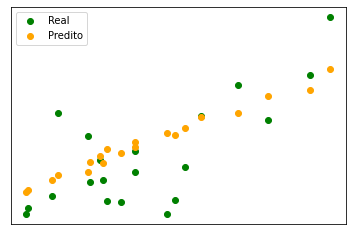

In [6]:

#plt.scatter(X_teste,y_teste,  color='black')
plt.scatter(Z_teste["bmi"], y_teste, color='green')

#plt.plot(X_teste, diabetes_y_pred, color='blue', linewidth=2)
plt.scatter(Z_teste["bmi"], diabetes_y_pred2, color='orange')
plt.legend(["Real", "Predito"])


plt.xticks(())
plt.yticks(())
plt.show()

In [7]:
#erroabs=sum(abs(y_teste-diabetes_y_pred.reshape(-1,1)))
#errorlt=sum((abs(y_teste-diabetes_y_pred.reshape(-1,1))/y_teste*0.01))
#print('Erro Absoluto - Erro:', erroabs)
#print ('Erro Reltivo - Erro:', errorlt)

erroabs2=sum(abs(y_teste-diabetes_y_pred2.reshape(-1,1)))
errorlt2=sum((abs(y_teste-diabetes_y_pred2.reshape(-1,1))/y_teste*0.01))
print('Erro Absoluto 2 - Erro:', erroabs2)
print ('Erro Reltivo 2 - Erro:', errorlt2)

Erro Absoluto 2 - Erro: [846.47967869]
Erro Reltivo 2 - Erro: [0.0977571]
